<a href="https://colab.research.google.com/github/agus-fran-1998/Alojamiento_DDBB/blob/main/GRUPO_4_Telecom_Churn_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una empresa de telecomunicaciones desea mejorar la retención de sus clientes, identificando aquellos que tienen más chances de abandonar el servicio (Churn). Como científico de datos, tu objetivo será limpiar y preparar un conjunto de datos para el entrenamiento de un modelo de Churn. A continuación, se presentan las preguntas clave que guiarán el proceso de limpieza de datos:

### **Preguntas**

1. ¿Qué insights podemos obtener del análisis exploratorio inicial del conjunto de datos?

2. ¿Qué transformaciones básicas son necesarias para preparar los datos?

3. ¿Cómo podemos identificar y tratar los datos duplicados y los valores nulos?

4. ¿Cómo manejamos los outliers presentes en el dataset?

5. ¿Qué técnicas aplicamos para procesar las variables categóricas?

#**1. Configuración del Ambiente**


---




In [853]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
global datos_churn

#**2. Obtención y Tratamiento de Datos**


---




##**2.1 Cargando las bases de datos**

In [854]:
url_json = "https://raw.githubusercontent.com/agus-fran-1998/Alojamiento_DDBB/refs/heads/main/TELECOM_CHURN/base_clientes_churn-BX-09-2024.json"
datos_churn = pd.read_json(url_json)
datos_churn.head()

,id_cliente,Churn,cliente,telefono,internet,cuenta
0,0002-ORFBO,no,"{'genero': 'femenino', 'anciano': 0, 'pareja':...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'DSL', 'seguridad_online...","{'contrato': None, 'facturacion_electronica': ..."
1,0003-MKNFE,no,"{'genero': 'masculino', 'anciano': 0, 'pareja'...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'DSL', 'seguridad_online...","{'contrato': 'mensual', 'facturacion_electroni..."
2,0004-TLHLJ,si,"{'genero': 'masculino', 'anciano': 0, 'pareja'...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'fibra optica', 'segurid...","{'contrato': 'mensual', 'facturacion_electroni..."
3,0011-IGKFF,si,"{'genero': 'masculino', 'anciano': 1, 'pareja'...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'fibra optica', 'segurid...","{'contrato': 'mensual', 'facturacion_electroni..."
4,0013-EXCHZ,si,"{'genero': 'femenino', 'anciano': 1, 'pareja':...","{'servicio_telefono': 'si', 'varias_lineas': '...","{'servicio_internet': 'fibra optica', 'segurid...","{'contrato': 'mensual', 'facturacion_electroni..."


In [855]:
def leer_datos():
    response = requests.get(url_json)
    json_bruto = response.json()  # Asumiendo que el archivo es directamente un JSON válido
    datos_churn = pd.json_normalize(json_bruto)
    return datos_churn

leer_datos()


,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
0,0002-ORFBO,no,femenino,0,si,si,9.0,si,no,DSL,no,si,no,si,si,no,None,None,None,NaN,None
1,0003-MKNFE,no,masculino,0,no,no,9.0,si,si,DSL,no,no,no,no,no,si,mensual,no,cheque,59.90,542.4
2,0004-TLHLJ,si,masculino,0,no,no,4.0,si,no,fibra optica,no,no,si,no,no,no,mensual,si,cheque electronico,73.90,280.85
3,0011-IGKFF,si,masculino,1,si,no,13.0,si,no,fibra optica,no,si,si,no,si,si,mensual,si,cheque electronico,98.00,1237.85
4,0013-EXCHZ,si,femenino,1,si,no,3.0,si,no,fibra optica,no,no,no,si,si,no,mensual,si,cheque,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,5172-RKOCB,no,masculino,0,si,no,72.0,si,si,fibra optica,si,si,no,si,si,si,dos años,si,tarjeta de credito (automatico),108.95,7875
7340,1934-MKPXS,no,masculino,0,si,si,33.0,si,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,un año,no,tarjeta de credito (automatico),20.10,620.55
7341,5959-BELXA,si,masculino,1,no,no,32.0,si,si,fibra optica,no,no,no,no,si,si,mensual,si,tarjeta de credito (automatico),96.15,3019.25
7342,3601-UTZXO,,masculino,0,si,si,41.0,si,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,un año,no,transferencia bancaria (automatica),19.50,798.2


In [856]:
datos_churn = leer_datos()
datos_churn.shape

(7344, 21)

In [857]:
datos_churn.dtypes

,0
id_cliente,object
Churn,object
cliente.genero,object
cliente.anciano,int64
cliente.pareja,object
cliente.dependientes,object
cliente.tiempo_servicio,float64
telefono.servicio_telefono,object
telefono.varias_lineas,object
internet.servicio_internet,object


In [858]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7344 non-null   object 
 1   Churn                            7344 non-null   object 
 2   cliente.genero                   7344 non-null   object 
 3   cliente.anciano                  7344 non-null   int64  
 4   cliente.pareja                   7344 non-null   object 
 5   cliente.dependientes             7344 non-null   object 
 6   cliente.tiempo_servicio          7336 non-null   float64
 7   telefono.servicio_telefono       7344 non-null   object 
 8   telefono.varias_lineas           7344 non-null   object 
 9   internet.servicio_internet       7344 non-null   object 
 10  internet.seguridad_online        7344 non-null   object 
 11  internet.backup_online           7344 non-null   object 
 12  internet.proteccion_

##**Visualizando mas a fondo algunas columnas**

In [859]:
datos_churn.describe()

,cliente.anciano,cliente.tiempo_servicio,cuenta.cobros.mensual
count,7344.000000,7336.000000,7326.000000
mean,0.162990,33.271265,64.683770
std,0.369382,35.776684,30.143033
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.362500
50%,0.000000,29.000000,70.300000
75%,0.000000,56.000000,89.887500
max,1.000000,1080.000000,118.750000


<Axes: >

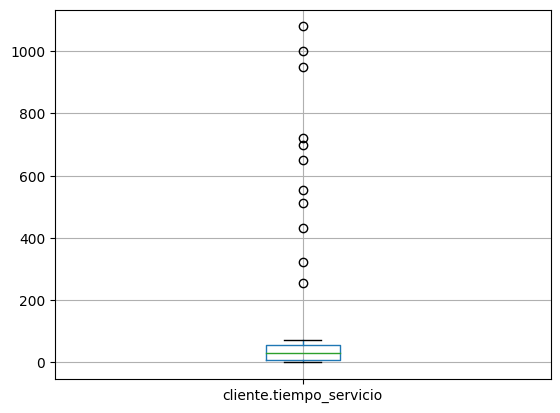

In [860]:
# Verificamos que hay inconsistencias en la columna 'cliente.tiempo_servicio',
# con clientes con más de 200 meses de servicio e incluso 1080 meses.
datos_churn.boxplot(['cliente.tiempo_servicio'])

In [861]:
print(type(datos_churn))


<class 'pandas.core.frame.DataFrame'>


In [862]:
datos_churn[datos_churn['cuenta.metodo_pago'].isna()].head(2)

,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
0,0002-ORFBO,no,femenino,0,si,si,9.0,si,no,DSL,no,si,no,si,si,no,None,None,None,NaN,None
994,1396-QWFBJ,si,femenino,0,si,si,21.0,si,no,fibra optica,no,si,no,no,no,no,None,si,None,NaN,1565.7


In [863]:
datos_churn[datos_churn['cliente.tiempo_servicio'].isna()].head(5)

,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
9,0016-QLJIS,no,femenino,0,si,si,NaN,si,si,DSL,si,si,si,si,si,si,dos años,si,cheque,90.45,5957.9
181,0282-NVSJS,no,femenino,1,si,si,NaN,no,sin servicio de telefono,DSL,no,no,no,si,no,no,mensual,si,cheque,29.30,355.9
186,0295-QVKPB,no,masculino,0,no,no,NaN,si,no,DSL,no,no,si,si,si,no,mensual,si,tarjeta de credito (automatico),63.95,318.1
773,1095-WGNGG,no,femenino,0,si,no,NaN,si,si,fibra optica,no,si,no,no,si,si,dos años,si,transferencia bancaria (automatica),101.05,5971.25
3624,4994-OBRSZ,no,masculino,0,no,si,NaN,si,no,DSL,si,si,si,si,no,si,dos años,no,transferencia bancaria (automatica),76.10,1054.8


In [864]:
datos_churn["cuenta.contrato"].value_counts()

,count
cuenta.contrato,
mensual,4039
dos años,1755
un año,1518


In [865]:
datos_churn["cuenta.facturacion_electronica"].value_counts()

,count
cuenta.facturacion_electronica,
si,4344
no,2982


In [866]:
# Identificación de índices con valores vacíos en `cct`
indices_cct_vacios = datos_churn[datos_churn['cuenta.cobros.Total'].isnull()]
indices_cct_vacios.head(3)


,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
0,0002-ORFBO,no,femenino,0,si,si,9.0,si,no,DSL,no,si,no,si,si,no,None,None,None,NaN,None
1645,2333-KWEWW,no,masculino,0,no,no,18.0,si,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,None,no,None,20.05,None
1646,2335-GSODA,no,masculino,0,no,si,23.0,no,sin servicio de telefono,DSL,si,no,si,si,no,no,None,no,None,NaN,None


In [867]:
# plt.figure(figsize=(7, 6))
# sns.countplot(data=datos_churn, x='cuenta.cobros.Total')
# plt.title('Distribución de cct')
# plt.xticks(rotation=45)
# plt.show()

##**2.2 Tratamiento de datos**

In [868]:
url_txt = "https://raw.githubusercontent.com/agus-fran-1998/Alojamiento_DDBB/refs/heads/main/TELECOM_CHURN/Diccionario.txt"
response = requests.get(url_txt) # Hacer la solicitud GET a la URL

if response.status_code == 200:  # Verificar si la solicitud fue exitosa (status code 200)
    contenido = response.text    # El contenido del archivo
    print(contenido)
else:
    print(f"Error al acceder al archivo: {response.status_code}")

La base de datos contiene columnas además del ID de los clientes y el churn:

Cliente:
género: género (masculino y femenino)
anciano: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
pareja: si el cliente tiene o no una pareja
dependientes: si el cliente tiene o no dependientes
tiempo_servicio: meses de contrato del cliente

Servicio de telefonía:
servicio_telefono: suscripción al servicio telefónico
varias_lineas: suscripción a más de una línea telefónica

Servicio de internet:
servicio_internet: suscripción a un proveedor de internet
seguridad_online: suscripción adicional a seguridad en línea
backup_online: suscripción adicional a copias de seguridad en línea
proteccion_dispositivo: suscripción adicional a protección en el dispositivo
soporte_tecnico: suscripción adicional a soporte técnico, menos tiempo de espera
tv_streaming: suscripción a TV por cable
peliculas_streaming: suscripción a streaming de películas

Cuenta:
contrato: tipo de contrato
factura_e

In [869]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7344 non-null   object 
 1   Churn                            7344 non-null   object 
 2   cliente.genero                   7344 non-null   object 
 3   cliente.anciano                  7344 non-null   int64  
 4   cliente.pareja                   7344 non-null   object 
 5   cliente.dependientes             7344 non-null   object 
 6   cliente.tiempo_servicio          7336 non-null   float64
 7   telefono.servicio_telefono       7344 non-null   object 
 8   telefono.varias_lineas           7344 non-null   object 
 9   internet.servicio_internet       7344 non-null   object 
 10  internet.seguridad_online        7344 non-null   object 
 11  internet.backup_online           7344 non-null   object 
 12  internet.proteccion_

In [870]:
print(datos_churn.Churn.value_counts())


Churn
no    5223
si    1895
       226
Name: count, dtype: int64


In [871]:
datos_churn['Churn'].unique()

array(['no', 'si', ''], dtype=object)

<ipython-input-872-34d8791a28fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_churn, x='Churn', palette='inferno')


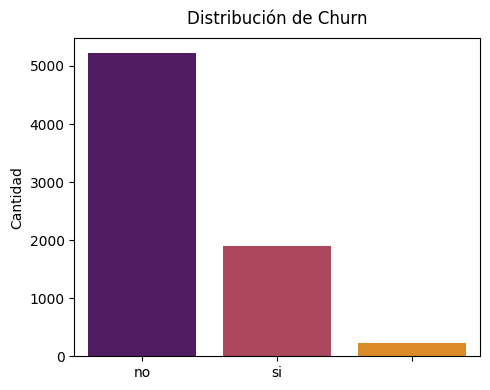

In [872]:
plt.figure(figsize=(5, 4))
sns.countplot(data=datos_churn, x='Churn', palette='inferno')
plt.title('Distribución de Churn', pad=10)
plt.xlabel('')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show();

In [873]:
def preprocesamiento():
    # Declarar que se usará la variable global `datos_churn`
    global datos_churn

    # Reemplazar espacios vacíos y cadenas vacías con NaN en 'cuenta.cobros.Total'
    datos_churn['cuenta.cobros.Total'] = datos_churn['cuenta.cobros.Total'].replace(['', ' '], np.nan)

    # Identificación de índices con valores NaN en 'cuenta.cobros.Total'
    indices_cct_vacios = datos_churn[datos_churn['cuenta.cobros.Total'].isnull()].index

    # Calcular 'cuenta.cobros.Total' para las filas con valores NaN (usando 'cuenta.cobros.mensual' * 24)
    datos_churn.loc[indices_cct_vacios, 'cuenta.cobros.Total'] = datos_churn.loc[indices_cct_vacios, 'cuenta.cobros.mensual'] * 24

    # Asignar un valor de 'cliente.tiempo_servicio' igual a 24 para las filas donde se calculó el valor anterior
    datos_churn.loc[indices_cct_vacios, 'cliente.tiempo_servicio'] = 24

    # Convertir la columna 'cuenta.cobros.Total' a tipo float (ahora que está limpia)
    # Los NaN no causarán problemas en la conversión
    datos_churn['cuenta.cobros.Total'] = datos_churn['cuenta.cobros.Total'].astype(float)

    # Seleccionar las columnas de tipo objeto
    columnas_object = datos_churn.select_dtypes(include='object').columns

    # Reemplazar cadenas vacías con NaN en las columnas de tipo objeto
    datos_churn[columnas_object] = datos_churn[columnas_object].replace('', np.nan)

    # Eliminar filas que tengan valores NaN en cualquiera de las columnas de tipo objeto
    datos_churn = datos_churn.dropna(subset=columnas_object)

    # Eliminación de filas duplicadas
    datos_churn = datos_churn.drop_duplicates()

    # Relleno de valores faltantes en `cts` basados en el cálculo `cct / ccm`
    datos_churn['cliente.tiempo_servicio'] = datos_churn['cliente.tiempo_servicio'].fillna(datos_churn['cuenta.cobros.Total'] / datos_churn['cuenta.cobros.mensual'])

    # Identificación de columnas para eliminar nulos (`ccont`, `cfe`, y `cmp`)
    columnas_para_eliminar_nulos = ['cuenta.contrato', 'cuenta.facturacion_electronica', 'cuenta.metodo_pago']

    # Eliminación de filas con valores `NaN` en columnas específicas
    datos_churn = datos_churn.dropna(subset=columnas_para_eliminar_nulos)

     # Convertir la columna `ctr` de float a int
    if 'cliente.tiempo_servicio' in datos_churn.columns:
        datos_churn['cliente.tiempo_servicio'] = datos_churn['cliente.tiempo_servicio'].astype(int)

    # Reinicio del índice
    datos_churn = datos_churn.reset_index(drop=True)

    # Cálculo del rango intercuartílico (IQR) para `cts`
    Q1 = datos_churn['cliente.tiempo_servicio'].quantile(0.25)
    Q3 = datos_churn['cliente.tiempo_servicio'].quantile(0.75)
    IQR = Q3 - Q1

    # Determinación de límites inferior y superior para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificación de outliers en `cts`
    outliers_cts = datos_churn[(datos_churn['cliente.tiempo_servicio']
                                < limite_inferior) | (datos_churn['cliente.tiempo_servicio'] > limite_superior)].index

    # Corrección de outliers (en este caso, recalculemos `cts` como la media)
    datos_churn.loc[outliers_cts, 'cliente.tiempo_servicio'] = datos_churn['cliente.tiempo_servicio'].mean()

    # Recalcular cuartiles Q1 y Q3 para `cts`
    Q1 = datos_churn['cliente.tiempo_servicio'].quantile(0.25)
    Q3 = datos_churn['cliente.tiempo_servicio'].quantile(0.75)
    IQR = Q3 - Q1

    # Determinar nuevos límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Eliminar outliers de `cts`
    datos_churn = datos_churn[(datos_churn['cliente.tiempo_servicio']
                               >= limite_inferior) & (datos_churn['cliente.tiempo_servicio'] <= limite_superior)]

    # Reiniciar el índice final del DataFrame
    datos_churn = datos_churn.reset_index(drop=True)

    return datos_churn

In [874]:
# Filtrar filas con valores NaN en la columna 'cts'
datos_churn[datos_churn['cliente.tiempo_servicio'].isna()]


,id_cliente,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,telefono.varias_lineas,internet.servicio_internet,internet.seguridad_online,internet.backup_online,internet.proteccion_dispositivo,internet.soporte_tecnico,internet.tv_streaming,internet.peliculas_streaming,cuenta.contrato,cuenta.facturacion_electronica,cuenta.metodo_pago,cuenta.cobros.mensual,cuenta.cobros.Total
9,0016-QLJIS,no,femenino,0,si,si,NaN,si,si,DSL,si,si,si,si,si,si,dos años,si,cheque,90.45,5957.9
181,0282-NVSJS,no,femenino,1,si,si,NaN,no,sin servicio de telefono,DSL,no,no,no,si,no,no,mensual,si,cheque,29.30,355.9
186,0295-QVKPB,no,masculino,0,no,no,NaN,si,no,DSL,no,no,si,si,si,no,mensual,si,tarjeta de credito (automatico),63.95,318.1
773,1095-WGNGG,no,femenino,0,si,no,NaN,si,si,fibra optica,no,si,no,no,si,si,dos años,si,transferencia bancaria (automatica),101.05,5971.25
3624,4994-OBRSZ,no,masculino,0,no,si,NaN,si,no,DSL,si,si,si,si,no,si,dos años,no,transferencia bancaria (automatica),76.10,1054.8
5434,7435-ZNUYY,no,masculino,0,no,no,NaN,si,no,no,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,sin servicio de internet,un año,no,cheque,20.60,116.6
5437,7445-WMRBW,no,femenino,0,no,no,NaN,si,si,DSL,no,si,si,si,si,no,un año,si,transferencia bancaria (automatica),73.85,3581.4
6316,8690-UPCZI,no,masculino,0,si,si,NaN,si,si,DSL,si,no,no,si,si,no,un año,no,transferencia bancaria (automatica),69.05,1958.45


In [875]:
preprocesamiento()
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7006 non-null   object 
 1   Churn                            7006 non-null   object 
 2   cliente.genero                   7006 non-null   object 
 3   cliente.anciano                  7006 non-null   int64  
 4   cliente.pareja                   7006 non-null   object 
 5   cliente.dependientes             7006 non-null   object 
 6   cliente.tiempo_servicio          7006 non-null   float64
 7   telefono.servicio_telefono       7006 non-null   object 
 8   telefono.varias_lineas           7006 non-null   object 
 9   internet.servicio_internet       7006 non-null   object 
 10  internet.seguridad_online        7006 non-null   object 
 11  internet.backup_online           7006 non-null   object 
 12  internet.proteccion_

<ipython-input-873-58da3da08579>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_churn['cliente.tiempo_servicio'] = datos_churn['cliente.tiempo_servicio'].fillna(datos_churn['cuenta.cobros.Total'] / datos_churn['cuenta.cobros.mensual'])
<ipython-input-873-58da3da08579>:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.28504139309164' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datos_churn.loc[outliers_cts, 'cliente.tiempo_servicio'] = datos_churn['cliente.tiempo_servicio'].mean()


##**2.3 Normalizacion de datos**

In [876]:
for col in datos_churn.columns:
    print(f"Columna: {col}")
    print(datos_churn[col].unique())
    print("-" * 30)

Columna: id_cliente
['0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Churn
['no' 'si']
------------------------------
Columna: cliente.genero
['masculino' 'femenino']
------------------------------
Columna: cliente.anciano
[0 1]
------------------------------
Columna: cliente.pareja
['no' 'si']
------------------------------
Columna: cliente.dependientes
['no' 'si']
------------------------------
Columna: cliente.tiempo_servicio
[ 9.          4.         13.          3.         71.         63.
  7.         65.         54.         72.          5.         56.
 34.          1.         45.         50.         23.         55.
 26.         69.         37.         49.         66.         67.
 20.         43.         59.         12.         27.          2.
 25.         29.         14.         35.         64.         39.
 40.         11.          6.         30.         70.         57.
 58.         16.         32.        

In [877]:
def normalizacion():
    global datos_churn

    # 1. Eliminación de la columna `id_cliente`
    if 'id_cliente' in datos_churn.columns:
        datos_churn = datos_churn.drop('id_cliente', axis=1)

    # 2. Definición de un diccionario de mapeo para convertir categorías
    diccionario_mapeo = {
        'no': 0,
        'si': 1,
        'masculino': 0,
        'femenino': 1
    }

    # 3. Especificación de columnas a normalizar
    columnas_a_normalizar = ['telefono.servicio_telefono', 'Churn', 'cliente.pareja', 'cliente.dependientes',
                             'cuenta.facturacion_electronica', 'cliente.genero']

    # 4. Reemplazo de categorías por valores numéricos usando el diccionario de mapeo
    datos_churn[columnas_a_normalizar] = datos_churn[columnas_a_normalizar].replace(diccionario_mapeo)

    # 5. Creación de variables dummy para otras columnas categóricas restantes
    datos_churn = pd.get_dummies(datos_churn, drop_first=True)

    # 6. Convertir columnas de tipo booleano a 0 y 1
    bool_columns = datos_churn.select_dtypes(include='bool').columns
    datos_churn[bool_columns] = datos_churn[bool_columns].astype(int)

    # 7. Reiniciar el índice del DataFrame para eliminar el índice anterior
    datos_churn.reset_index(drop=True, inplace=True)

    return datos_churn


In [878]:
normalizacion()
datos_churn.head()

<ipython-input-877-cef280a5a31b>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_churn[columnas_a_normalizar] = datos_churn[columnas_a_normalizar].replace(diccionario_mapeo)


,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,cuenta.facturacion_electronica,cuenta.cobros.mensual,cuenta.cobros.Total,telefono.varias_lineas_si,telefono.varias_lineas_sin servicio de telefono,internet.servicio_internet_fibra optica,internet.servicio_internet_no,internet.seguridad_online_si,internet.seguridad_online_sin servicio de internet,internet.backup_online_si,internet.backup_online_sin servicio de internet,internet.proteccion_dispositivo_si,internet.proteccion_dispositivo_sin servicio de internet,internet.soporte_tecnico_si,internet.soporte_tecnico_sin servicio de internet,internet.tv_streaming_si,internet.tv_streaming_sin servicio de internet,internet.peliculas_streaming_si,internet.peliculas_streaming_sin servicio de internet,cuenta.contrato_mensual,cuenta.contrato_un año,cuenta.metodo_pago_cheque electronico,cuenta.metodo_pago_tarjeta de credito (automatico),cuenta.metodo_pago_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.9,542.40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,4.0,1,1,73.9,280.85,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.0,1237.85,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.9,267.40,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,9.0,1,1,69.4,571.45,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0


In [879]:
datos_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Churn                                                     7006 non-null   int64  
 1   cliente.genero                                            7006 non-null   int64  
 2   cliente.anciano                                           7006 non-null   int64  
 3   cliente.pareja                                            7006 non-null   int64  
 4   cliente.dependientes                                      7006 non-null   int64  
 5   cliente.tiempo_servicio                                   7006 non-null   float64
 6   telefono.servicio_telefono                                7006 non-null   int64  
 7   cuenta.facturacion_electronica                            7006 non-null   int64  
 8   cuenta.cobros.mens

In [880]:
# Convertir la columna `cts ` de float a int
if 'cliente.tiempo_servicio' in datos_churn.columns:
        datos_churn['cliente.tiempo_servicio'] = datos_churn['cliente.tiempo_servicio'].astype(int)

In [881]:
datos_churn["Churn"].value_counts(normalize=True)

,proportion
Churn,
0,0.735084
1,0.264916


In [882]:
datos_churn["Churn"].value_counts()

,count
Churn,
0,5150
1,1856


#**3. Modelo Random Forest**


---


In [883]:
y = datos_churn['Churn']
x = datos_churn.drop(columns='Churn')
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state = 50)

In [884]:
def balancear_clases(train_x, train_y):
    # Unir X e y de entrenamiento para balancear
    df_train = pd.concat([train_x, train_y], axis=1)
    df_minority = df_train[df_train["Churn"] == 1]
    df_majority = df_train[df_train["Churn"] == 0]

    # Aumentar la clase minoritaria
    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=50)

    # Combinar las clases balanceadas
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])

    # Separar nuevamente train_x y train_y
    train_x_balanced = df_upsampled.drop(columns="Churn")
    train_y_balanced = df_upsampled["Churn"]

    return train_x_balanced, train_y_balanced

RandomForest con base de datos sin balancear.

In [885]:
def pronosticar(train_x, train_y):
  model = RandomForestClassifier(random_state=50)
  model.fit(train_x, train_y)
  return model

In [886]:
model_no_balanceado = pronosticar(train_x, train_y)
print("Accuracy sin balancear:", model_no_balanceado.score(test_x, test_y))

Accuracy sin balancear: 0.7830637488106565


RandomForest con base de datos balanceada.

In [887]:
train_x_balanced, train_y_balanced = balancear_clases(train_x, train_y)
model_balanceado = pronosticar(train_x_balanced, train_y_balanced)
print("Accuracy con balanceo:", model_balanceado.score(test_x, test_y))


Accuracy con balanceo: 0.7797335870599429


Guardando la base balanceada para probar otros modelos.

In [888]:
datos_balanceados = pd.concat([train_x_balanced, train_y_balanced], axis=1)

In [889]:
datos_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7260 entries, 2800 to 1447
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   cliente.genero                                            7260 non-null   int64  
 1   cliente.anciano                                           7260 non-null   int64  
 2   cliente.pareja                                            7260 non-null   int64  
 3   cliente.dependientes                                      7260 non-null   int64  
 4   cliente.tiempo_servicio                                   7260 non-null   int64  
 5   telefono.servicio_telefono                                7260 non-null   int64  
 6   cuenta.facturacion_electronica                            7260 non-null   int64  
 7   cuenta.cobros.mensual                                     7260 non-null   float64
 8   cuenta.cobros.Total 

#**4. Reducción de Dimensionalidad**


---


##**4.1 Métodos Gráficos**

In [890]:
# def diagrama_violin(df, inicio, fin):
#     # Asegurar que Churn siempre esté en el DataFrame
#     y = df["Churn"]
#     # Seleccionar solo las columnas de tipo int64
#     x = df.select_dtypes(include=["int64"]).iloc[:, inicio:fin]

#     # Concatenar la columna Churn con las columnas seleccionadas
#     df_filtered = pd.concat([y, x], axis=1)

#     # Convertir el DataFrame a formato largo (long format)
#     df_melted = pd.melt(df_filtered, id_vars="Churn", var_name="features", value_name="valores")

#     plt.figure(figsize=(12, 6))

#     # Crear el diagrama de violín, diferenciando por la columna Churn y usando la paleta azul-naranja
#     sns.violinplot(x="features", y="valores", hue="Churn", data=df_melted, split=True,palette="deep")

#     plt.xticks(rotation=90)  # Rotar etiquetas del eje X
#     plt.title("Diagrama de Violín: Comparación de Características vs Churn")
#     plt.ylabel("Valores")
#     plt.grid(True)

#     # Mostrar el gráfico
#     plt.show()


# def diagrama_puntos(df, inicio, fin):
#     # Asegura que Churn siempre esté en el dataframe
#     y = df["Churn"]
#     # Seleccionar solo las columnas de tipo int32 y excluir la columna Churn
#     x = df.select_dtypes(include=["int"]).drop(columns="Churn")

#     # Filtrar las columnas seleccionadas
#     df_filtered = pd.concat([y.reset_index(drop=True), x.iloc[:, inicio:fin]], axis=1)  # Concatenar la columna Churn

#     # Convertir el DataFrame a formato largo
#     df_melted = pd.melt(df_filtered, id_vars="Churn", var_name="features", value_name="valores")

#     plt.figure(figsize=(12, 6))

#     # Crear un diagrama de puntos
#     sns.pointplot(x="features", y="valores", hue="Churn", data=df_melted, palette="deep", markers=["o", "s"])

#     plt.xticks(rotation=90)  # Rotar etiquetas del eje X
#     plt.title("Diagrama de Puntos: Comparación de Características vs Churn (int64)")
#     plt.xlabel("Características")
#     plt.ylabel("Valores")
#     plt.grid(True)

#     # Mostrar el gráfico
#     plt.show()

In [891]:
# diagrama_violin(datos_churn, 0, 30)

In [892]:
# diagrama_puntos(datos_churn, 1, 30)

,Churn,cliente.genero,cliente.anciano,cliente.pareja,cliente.dependientes,cliente.tiempo_servicio,telefono.servicio_telefono,cuenta.facturacion_electronica,cuenta.cobros.mensual,cuenta.cobros.Total,telefono.varias_lineas_si,telefono.varias_lineas_sin servicio de telefono,internet.servicio_internet_fibra optica,internet.servicio_internet_no,internet.seguridad_online_si,internet.seguridad_online_sin servicio de internet,internet.backup_online_si,internet.backup_online_sin servicio de internet,internet.proteccion_dispositivo_si,internet.proteccion_dispositivo_sin servicio de internet,internet.soporte_tecnico_si,internet.soporte_tecnico_sin servicio de internet,internet.tv_streaming_si,internet.tv_streaming_sin servicio de internet,internet.peliculas_streaming_si,internet.peliculas_streaming_sin servicio de internet,cuenta.contrato_mensual,cuenta.contrato_un año,cuenta.metodo_pago_cheque electronico,cuenta.metodo_pago_tarjeta de credito (automatico),cuenta.metodo_pago_transferencia bancaria (automatica)
Churn,1.000000,0.006911,0.149517,-0.150612,-0.163031,-0.355459,0.012705,0.190783,0.192578,-0.157728,0.039412,-0.012705,0.306873,-0.227472,-0.170538,-0.227472,-0.084391,-0.227472,-0.068540,-0.227472,-0.164162,-0.227472,0.063127,-0.227472,0.060917,-0.227472,0.405886,-0.178706,0.301358,-0.133744,-0.118582
cliente.genero,0.006911,1.000000,0.001703,0.003139,-0.008938,-0.004886,0.005980,0.011417,0.013497,-0.013612,0.007938,-0.005980,0.009915,-0.004989,0.017243,-0.004989,0.013805,-0.004989,0.002674,-0.004989,0.009066,-0.004989,0.008293,-0.004989,0.010394,-0.004989,0.002563,-0.008038,-0.002267,-0.000520,0.017153
cliente.anciano,0.149517,0.001703,1.000000,0.018036,-0.210070,0.016037,0.008961,0.156438,0.220321,0.080896,0.143770,-0.008961,0.256428,-0.182674,-0.038222,-0.182674,0.065166,-0.182674,0.058515,-0.182674,-0.060776,-0.182674,0.104784,-0.182674,0.118605,-0.182674,0.138737,-0.046711,0.170147,-0.022258,-0.016554
cliente.pareja,-0.150612,0.003139,0.018036,1.000000,0.452057,0.380942,0.017578,-0.015877,0.096397,0.255783,0.141685,-0.017578,0.000047,0.001376,0.143355,0.001376,0.141294,0.001376,0.154249,0.001376,0.119213,0.001376,0.124417,0.001376,0.117719,0.001376,-0.280989,0.081502,-0.083138,0.082871,0.109959
cliente.dependientes,-0.163031,-0.008938,-0.210070,0.452057,1.000000,0.162571,-0.000374,-0.111573,-0.114110,0.052679,-0.024125,0.000374,-0.166287,0.140215,0.080819,0.140215,0.023819,0.140215,0.014960,0.140215,0.062297,0.140215,-0.016933,0.140215,-0.039986,0.140215,-0.231801,0.066531,-0.149093,0.061180,0.050663
cliente.tiempo_servicio,-0.355459,-0.004886,0.016037,0.380942,0.162571,1.000000,0.007038,0.004129,0.245813,0.650220,0.331328,-0.007038,0.017361,-0.037419,0.327201,-0.037419,0.361488,-0.037419,0.361177,-0.037419,0.324964,-0.037419,0.278988,-0.037419,0.284575,-0.037419,-0.648644,0.202901,-0.209889,0.231867,0.244679
telefono.servicio_telefono,0.012705,0.005980,0.008961,0.017578,-0.000374,0.007038,1.000000,0.016824,0.246870,0.092662,0.279563,-1.000000,0.289671,0.172369,-0.093377,0.172369,-0.051809,0.172369,-0.071650,0.172369,-0.097194,0.172369,-0.023699,0.172369,-0.032958,0.172369,-0.000720,-0.002874,0.003989,-0.009241,0.007643
cuenta.facturacion_electronica,0.190783,0.011417,0.156438,-0.015877,-0.111573,0.004129,0.016824,1.000000,0.353154,0.117414,0.163302,-0.016824,0.328566,-0.321103,-0.003331,-0.321103,0.125549,-0.321103,0.104175,-0.321103,0.038266,-0.321103,0.223747,-0.321103,0.212617,-0.321103,0.169327,-0.051841,0.208820,-0.013679,-0.016962
cuenta.cobros.mensual,0.192578,0.013497,0.220321,0.096397,-0.114110,0.245813,0.246870,0.353154,1.000000,0.520961,0.489679,-0.246870,0.787172,-0.763881,0.297278,-0.763881,0.441150,-0.763881,0.481928,-0.763881,0.337844,-0.763881,0.629108,-0.763881,0.627486,-0.763881,0.060666,0.004290,0.272816,0.029885,0.042883
cuenta.cobros.Total,-0.157728,-0.013612,0.080896,0.255783,0.052679,0.650220,0.092662,0.117414,0.520961,1.000000,0.356571,-0.092662,0.290458,-0.302636,0.324432,-0.302636,0.403222,-0.302636

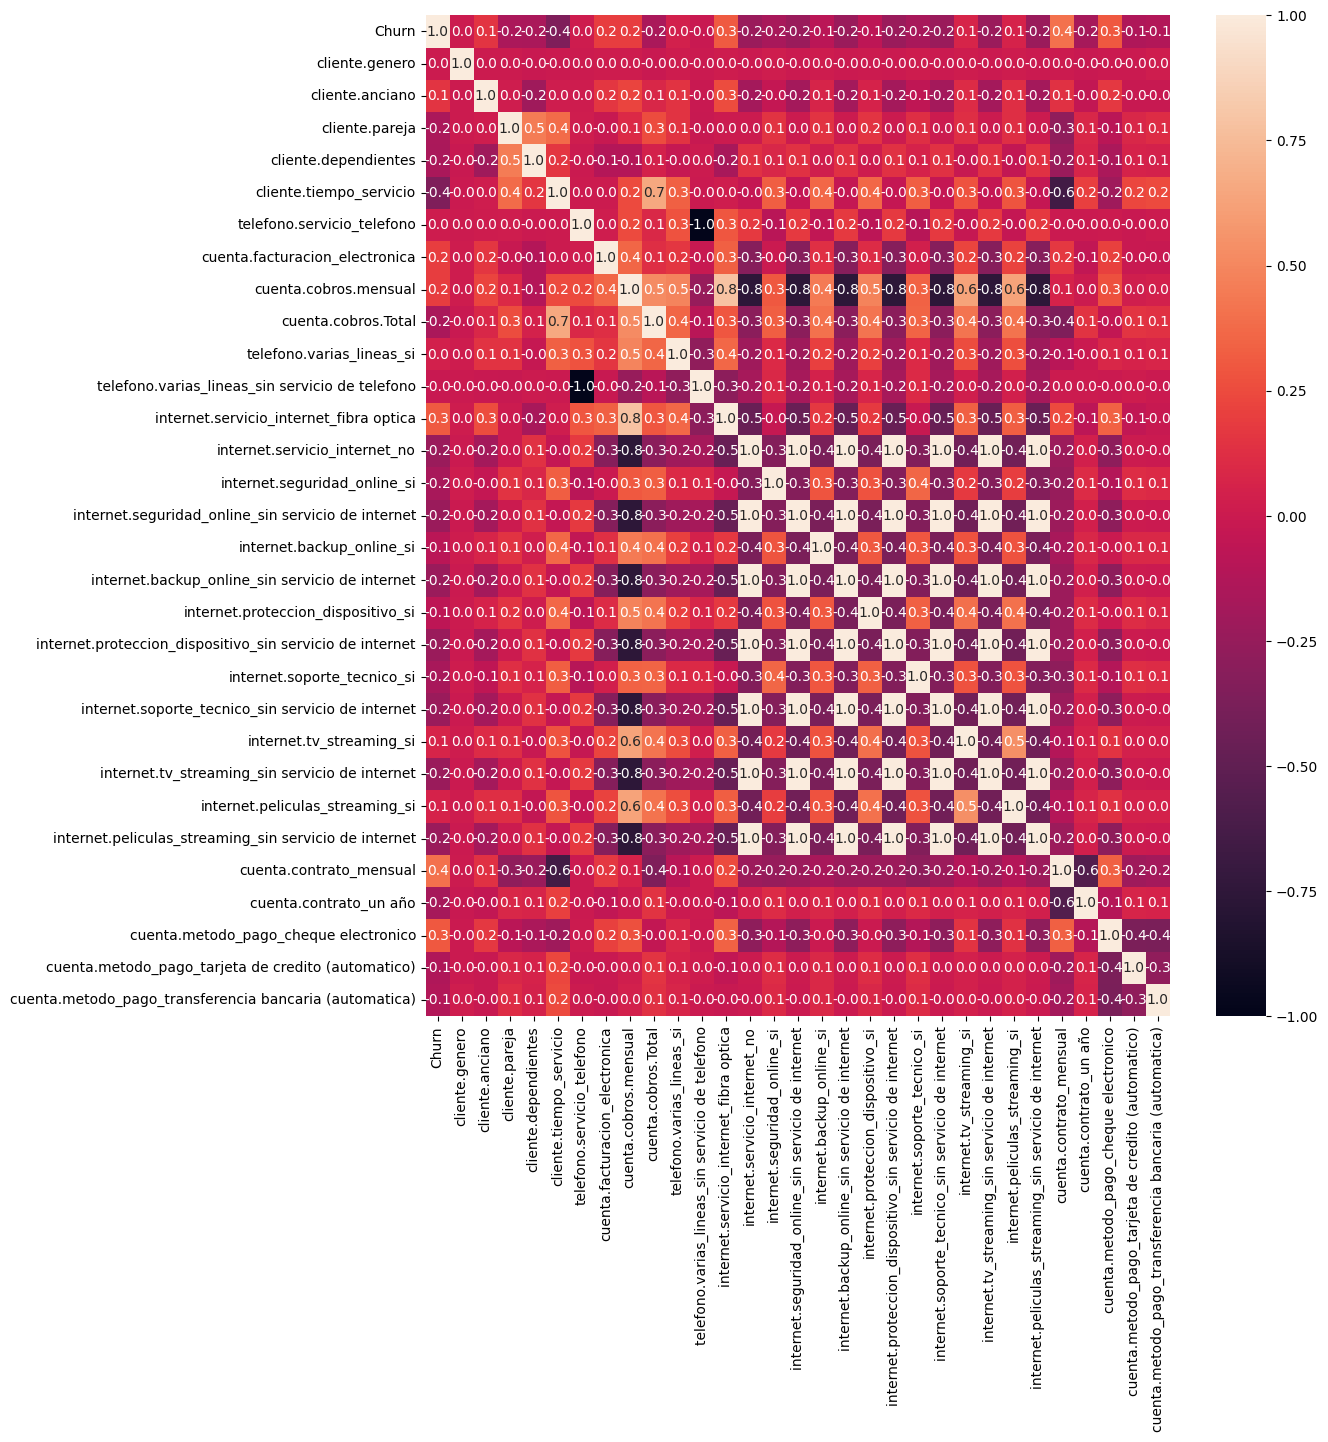

In [893]:
def mapa_calor(df):
  grafico = df.corr()
  plt.figure(figsize=(12,13))
  sns.heatmap(grafico, annot=True, fmt=".1f")
  return grafico

mapa_calor(datos_churn)

In [894]:
datos_churn.groupby('Churn')["telefono.varias_lineas_sin servicio de telefono"].value_counts(normalize=True)

Churn  telefono.varias_lineas_sin servicio de telefono
0      0                                                  0.900971
       1                                                  0.099029
1      0                                                  0.909483
       1                                                  0.090517
Name: proportion, dtype: float64

En este codigo se prueba con la base sin balancear.

In [895]:
train_x = train_x.drop(columns=["telefono.varias_lineas_sin servicio de telefono"])
test_x = test_x.drop(columns=["telefono.varias_lineas_sin servicio de telefono"])
model = pronosticar(train_x, train_y)
model.score(test_x, test_y)

0.7897240723120837

En este codigo se prueba con la base balanceada (solo sobre la clase de entrenamiento).

In [896]:
# Balancear las clases en el conjunto de entrenamiento
train_x_balanced, train_y_balanced = balancear_clases(train_x, train_y)

# Entrenar el modelo con los datos balanceados
model_balance = pronosticar(train_x_balanced, train_y_balanced)

# Evaluar el modelo en el conjunto de prueba
model_balance.score(test_x, test_y)


0.7797335870599429

##**4.2 Mapa de Calor**

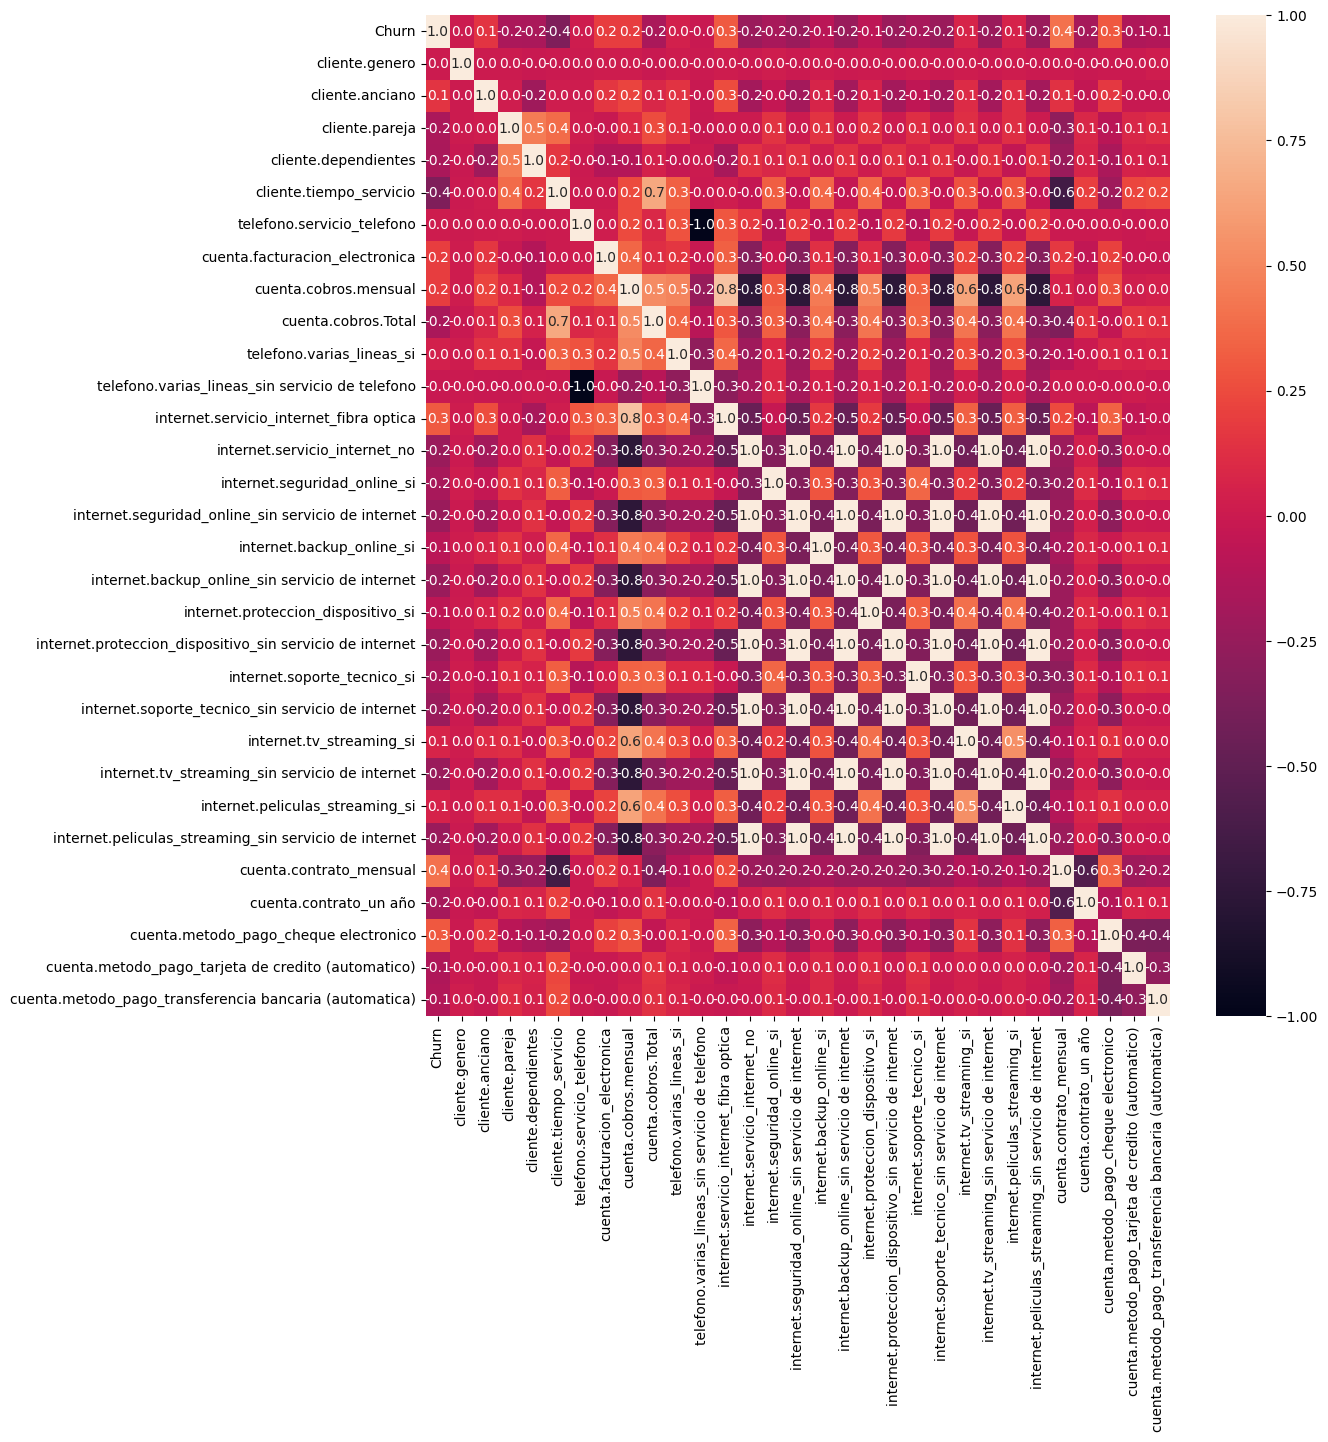

In [897]:
matriz = mapa_calor(datos_churn)

In [898]:
matriz2 = matriz>0.99
matriz2 = matriz2.sum()
matriz2[matriz2>1]

,0
internet.servicio_internet_no,7
internet.seguridad_online_sin servicio de internet,7
internet.backup_online_sin servicio de internet,7
internet.proteccion_dispositivo_sin servicio de internet,7
internet.soporte_tecnico_sin servicio de internet,7
internet.tv_streaming_sin servicio de internet,7
internet.peliculas_streaming_sin servicio de internet,7


Identificando variables NO relevantes para disminuir la carga en los entrenamientos de los modelos.

In [899]:
def identificar_variables(base):
    """
    base: DataFrame original con las variables.
    Esta función identifica y elimina las variables con correlación mayor a 0.99 repetidas varias veces.
    """
    # Paso 1: Calcular la matriz de correlación
    matriz_correlacion = base.corr().abs()

    # Paso 2: Crear una matriz booleana donde las correlaciones son mayores al umbral (0.99)
    matriz2 = matriz_correlacion > 0.99

    # Paso 3: Sumar cuántas veces cada columna tiene correlación fuerte con otras
    suma_correlacion = matriz2.sum()

    # Paso 4: Identificar las columnas que tienen correlaciones fuertes con más de una variable
    cols_corr_fuertes = suma_correlacion[suma_correlacion > 1].index.tolist()

    # Paso 5: Eliminar estas columnas del DataFrame original
    base_filtrada = base.drop(columns=cols_corr_fuertes)

    # Devolver el DataFrame filtrado y las columnas eliminadas (opcional)
    return base_filtrada, cols_corr_fuertes


In [900]:
df_filtrado, columnas_eliminadas = identificar_variables(datos_churn)
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Churn                                                   7006 non-null   int64  
 1   cliente.genero                                          7006 non-null   int64  
 2   cliente.anciano                                         7006 non-null   int64  
 3   cliente.pareja                                          7006 non-null   int64  
 4   cliente.dependientes                                    7006 non-null   int64  
 5   cliente.tiempo_servicio                                 7006 non-null   int64  
 6   cuenta.facturacion_electronica                          7006 non-null   int64  
 7   cuenta.cobros.mensual                                   7006 non-null   float64
 8   cuenta.cobros.Total                   

In [901]:
columnas_eliminadas

['telefono.servicio_telefono',
 'telefono.varias_lineas_sin servicio de telefono',
 'internet.servicio_internet_no',
 'internet.seguridad_online_sin servicio de internet',
 'internet.backup_online_sin servicio de internet',
 'internet.proteccion_dispositivo_sin servicio de internet',
 'internet.soporte_tecnico_sin servicio de internet',
 'internet.tv_streaming_sin servicio de internet',
 'internet.peliculas_streaming_sin servicio de internet']

**Datos sin balancear - Limpieza de columnas**

In [902]:
train_x = train_x.drop(columns=['internet.seguridad_online_sin servicio de internet', 'internet.peliculas_streaming_sin servicio de internet', 'internet.backup_online_sin servicio de internet', 'internet.tv_streaming_sin servicio de internet', 'internet.soporte_tecnico_sin servicio de internet', 'internet.proteccion_dispositivo_sin servicio de internet','cuenta.contrato_un año'])
test_x = test_x.drop(columns=['internet.seguridad_online_sin servicio de internet', 'internet.peliculas_streaming_sin servicio de internet', 'internet.backup_online_sin servicio de internet', 'internet.tv_streaming_sin servicio de internet', 'internet.soporte_tecnico_sin servicio de internet', 'internet.proteccion_dispositivo_sin servicio de internet','cuenta.contrato_un año'])
model = pronosticar(train_x, train_y)
model.score(test_x, test_y)

0.7825880114176974

**Datos balanceados**

In [903]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'internet.seguridad_online_sin servicio de internet',
    'internet.peliculas_streaming_sin servicio de internet',
    'internet.backup_online_sin servicio de internet',
    'internet.tv_streaming_sin servicio de internet',
    'internet.soporte_tecnico_sin servicio de internet',
    'internet.proteccion_dispositivo_sin servicio de internet',
    'cuenta.contrato_un año'
]

# Eliminar columnas solo si existen en train_x_balanced
train_x_balanced = train_x_balanced.drop(
    columns=[col for col in columnas_a_eliminar if col in train_x_balanced.columns])

# Eliminar columnas solo si existen en test_x
test_x = test_x.drop(
    columns=[col for col in columnas_a_eliminar if col in test_x.columns])

# Entrenar el modelo con la base balanceada
model = pronosticar(train_x_balanced, train_y_balanced)

# Evaluar el modelo
test_score = model.score(test_x, test_y)
print(f"Accuracy del modelo: {round(test_score, 4):.4f}")

Accuracy del modelo: 0.7826


##**4.3 Feature Importances**

###**4.3.1 Primero hacemos las pruebas con la base de datos sin balancear.**

In [904]:
def pronosticar_kbest(train_x, test_x, train_y, test_y):
  selector = SelectKBest(score_func=chi2, k=16)
  train_x_selected = selector.fit_transform(train_x, train_y)
  test_x_selected = selector.transform(test_x)
  model = RandomForestClassifier(random_state=50)
  model.fit(train_x_selected, train_y)
  test_score = model.score(test_x_selected, test_y)
  print(f"Probando Accuracy con SelectkBest y chi2: {round(test_score, 4):.4f}")

In [905]:
pronosticar_kbest(train_x, test_x, train_y, test_y)

Probando Accuracy con SelectkBest y chi2: 0.7812


In [906]:
def pronosticar_RFE(train_x, test_x, train_y, test_y):
     model = RandomForestClassifier(random_state=50)
     selector = RFE(estimator=model, n_features_to_select=16, step=5)
     train_x_selected = selector.fit_transform(train_x, train_y)
     test_x_selected = selector.transform(test_x)
     model.fit(train_x_selected, train_y)
     test_score = model.score(test_x_selected, test_y)
     print(f"Probando Accuracy con RFE: {round(test_score, 4):.4f}")

In [907]:
pronosticar_RFE(train_x, test_x, train_y, test_y)

Probando Accuracy con RFE: 0.7816


In [908]:
def pronosticar_RFECV(train_x, test_x, train_y, test_y):
    # Conviero train_x y test_x en dfs
    if isinstance(train_x, pd.Series):
        train_x = train_x.to_frame()
    if isinstance(test_x, pd.Series):
        test_x = test_x.to_frame()

    model = RandomForestClassifier(random_state=50)
    selector = RFECV(estimator=model, step=1, cv=5)  # cv=5 significa 5-fold cross-validation
    train_x_selected = selector.fit_transform(train_x, train_y)  # Ajustar y transformar el conjunto de entrenamiento
    test_x_selected = selector.transform(test_x)
    model.fit(train_x_selected, train_y)
    test_score = model.score(test_x_selected, test_y)
    print(f"Probando Accuracy con RFECV: {round(test_score, 4):.4f}")

In [909]:
pronosticar_RFECV(train_x, test_x, train_y, test_y)

Probando Accuracy con RFECV: 0.7816


In [910]:
def pronosticar_PCA(train_x, test_x, train_y, test_y):
    pca = PCA(n_components=10)
    train_x_PCA = pca.fit_transform(train_x)
    test_x_PCA = pca.transform(test_x)
    model = RandomForestClassifier(random_state=50)
    model.fit(train_x_PCA, train_y)
    test_score = model.score(test_x_PCA, test_y)
    print(f"Probando Accuracy con PCA: {round(test_score, 4):.4f}")

In [911]:
pronosticar_PCA(train_x, test_x, train_y, test_y)

Probando Accuracy con PCA: 0.7926


**Ahora probamos nuevamente los modelos con el balanceo de clases aplicado solo sobre la parte de entrenamiento**

In [912]:
def pronosticar_kbest(train_x_balanced, test_x, train_y_balanced, test_y):
  selector = SelectKBest(score_func=chi2, k=16)
  train_x_selected = selector.fit_transform(train_x_balanced, train_y_balanced)
  test_x_selected = selector.transform(test_x)
  model = RandomForestClassifier(random_state=50)
  model.fit(train_x_selected, train_y_balanced)
  test_score = model.score(test_x_selected, test_y)
  print(f"Probando Accuracy con SelectkBest y chi2: {round(test_score, 4):.4f}")

pronosticar_kbest(train_x_balanced, test_x, train_y_balanced, test_y)

Probando Accuracy con SelectkBest y chi2: 0.7793


In [913]:
def pronosticar_RFE(train_x_balanced, test_x, train_y_balanced, test_y):
     model = RandomForestClassifier(random_state=50)
     selector = RFE(estimator=model, n_features_to_select=10, step=1)
     train_x_selected = selector.fit_transform(train_x_balanced, train_y_balanced)
     test_x_selected = selector.transform(test_x)
     model.fit(train_x_selected, train_y_balanced)
     test_score = model.score(test_x_selected, test_y)
     print(f"Probando Accuracy con RFE: {round(test_score, 4):.4f}")

pronosticar_RFE(train_x_balanced, test_x, train_y_balanced, test_y)

Probando Accuracy con RFE: 0.7769


In [914]:
def pronosticar_RFECV(train_x_balanced, test_x, train_y_balanced, test_y):
    # Conviero train_x y test_x en dfs
    if isinstance(train_x_balanced, pd.Series):
        train_x_balanced = train_x_balanced.to_frame()
    if isinstance(test_x, pd.Series):
        test_x = test_x.to_frame()

    model = RandomForestClassifier(random_state=50)
    selector = RFECV(estimator=model, step=1, cv=5)  # cv=5 significa 5-fold cross-validation
    train_x_selected = selector.fit_transform(train_x_balanced, train_y_balanced)
    test_x_selected = selector.transform(test_x)
    model.fit(train_x_selected, train_y_balanced)
    test_score = model.score(test_x_selected, test_y)
    print(f"Probando Accuracy con RFECV: {round(test_score, 4):.4f}")

pronosticar_RFECV(train_x_balanced, test_x, train_y_balanced, test_y)

Probando Accuracy con RFECV: 0.7821


In [915]:
def pronosticar_PCA(train_x_balanced, test_x, train_y_balanced, test_y):
    pca = PCA(n_components=10)
    train_x_PCA = pca.fit_transform(train_x_balanced)
    test_x_PCA = pca.transform(test_x)
    model = RandomForestClassifier(random_state=50)
    model.fit(train_x_PCA, train_y_balanced)
    test_score = model.score(test_x_PCA, test_y)
    print(f"Probando Accuracy con PCA: {round(test_score, 4):.4f}")

pronosticar_PCA(train_x_balanced, test_x, train_y_balanced, test_y)

Probando Accuracy con PCA: 0.7869


###**4.3.2 Probamos nuevamente todos los modelos en una version de codigo mas compleja**

**NOTA:** Los modelos RFE y RFECV no se incluyeron porque su ejecucion demora demasiado!!!

In [916]:
def pronosticar_kbest(train_x, test_x, train_y, test_y):
    mejor_k = 0
    mejor_score = 0
    mejores_columnas = []

    # Iterar sobre el rango de posibles valores de k (número de características)
    for k in range(1, train_x.shape[1] + 1):
        seleccionar_mejores = SelectKBest(chi2, k=k)
        seleccionar_mejores.fit(train_x, train_y)
        train_x_kbest = seleccionar_mejores.transform(train_x)

        model = RandomForestClassifier(random_state=50)

        # Validación cruzada
        scores = cross_val_score(model, train_x_kbest, train_y, cv=5, scoring='accuracy')
        score = np.mean(scores)

        # Verificar si se ha alcanzado una mejor precisión
        if score > mejor_score:
            mejor_k = k
            mejor_score = score
            mejor_seleccionador = seleccionar_mejores
            mejores_columnas = train_x.columns[seleccionar_mejores.get_support()]  # Nombres de columnas

    # Ajustar el modelo con las mejores características
    mejor_model = RandomForestClassifier(random_state=50)
    train_x_kbest = mejor_seleccionador.transform(train_x)
    test_x_kbest = mejor_seleccionador.transform(test_x)
    mejor_model.fit(train_x_kbest, train_y)
    print(f"Utilizando SelectKBest:")
    print(f"El mejor número de características seleccionadas es {mejor_k} con un score de {mejor_score:.4f}")

In [917]:
pronosticar_kbest(train_x, test_x, train_y, test_y)

Utilizando SelectKBest:
El mejor número de características seleccionadas es 20 con un score de 0.7977


In [918]:
def pronosticar_PCA(train_x, test_x, train_y, test_y):
    n = 4
    pca = PCA(n_components=n)

    # Ajustar y transformar los datos con PCA
    train_x_pca = pca.fit_transform(train_x)
    model = RandomForestClassifier(random_state=50)
    model.fit(train_x_pca, train_y)
    test_x_pca = pca.transform(test_x)

    # Imprimir resultados de PCA
    print("Utilizando PCA:")
    print(f"El número de características seleccionadas es {n} con un score de {model.score(test_x_pca, test_y) * 100:.2f}%")

    # Calcular y mostrar el total de varianza explicada
    total_varianza_explicada = sum(pca.explained_variance_ratio_)
    print(f"Total de varianza explicada por el PCA: {total_varianza_explicada * 100:.2f}%")

    # Visualizar el explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n + 1), pca.explained_variance_ratio_, alpha=0.7, color='blue')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Componentes Principales')
    plt.title('Proporción de Varianza Explicada por Componente Principal')
    plt.xticks(np.arange(1, n + 1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Obtener las cargas de los componentes
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    component_names = [f'PC{i+1}' for i in range(n)]
    loadings_df = pd.DataFrame(loadings, index=train_x.columns, columns=component_names)

    # Imprimir las cargas de los componentes
    print("Cargas de los Componentes:")
    print(loadings_df.round(3))

In [919]:
from sklearn.preprocessing import StandardScaler
#PCA es sensible a datos no escalados
scaler = StandardScaler()
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

Utilizando PCA:
El número de características seleccionadas es 4 con un score de 76.45%
Total de varianza explicada por el PCA: 50.65%


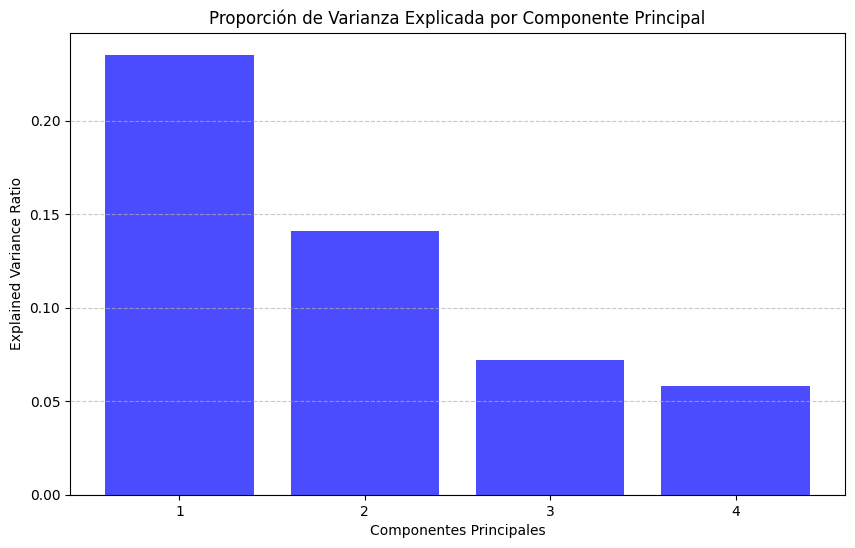

Cargas de los Componentes:
                                                      PC1    PC2    PC3    PC4
cliente.genero                                      0.013  0.013 -0.004 -0.096
cliente.anciano                                     0.186  0.347  0.088  0.034
cliente.pareja                                      0.299 -0.395  0.271 -0.027
cliente.dependientes                                0.020 -0.459  0.177  0.002
cliente.tiempo_servicio                             0.593 -0.589  0.190  0.020
telefono.servicio_telefono                          0.082  0.122  0.737  0.100
cuenta.facturacion_electronica                      0.331  0.375  0.021  0.023
cuenta.cobros.mensual                               0.885  0.384  0.076  0.005
cuenta.cobros.Total                                 0.778 -0.245  0.143  0.017
telefono.varias_lineas_si                           0.522  0.088  0.478  0.059
internet.servicio_internet_fibra optica             0.530  0.579  0.328  0.023
internet.servicio_interne

In [920]:
pronosticar_PCA(train_x_scaled, test_x_scaled, train_y, test_y)

**Modelos en su version de codigo mas compleja - datos balanceados**

In [921]:
def pronosticar_kbest_balanceado(train_x_balanced, test_x, train_y_balanced, test_y):
    mejor_k = 0
    mejor_score = 0
    mejores_columnas = []

    # Iterar sobre el rango de posibles valores de k (número de características)
    for k in range(1, train_x_balanced.shape[1] + 1):
        seleccionar_mejores = SelectKBest(chi2, k=k)
        seleccionar_mejores.fit(train_x_balanced, train_y_balanced)
        train_x_kbest = seleccionar_mejores.transform(train_x_balanced)

        model = RandomForestClassifier(random_state=50)

        # Validación cruzada
        scores = cross_val_score(model, train_x_kbest, train_y_balanced, cv=5, scoring='accuracy')
        score = np.mean(scores)

        # Verificar si se ha alcanzado una mejor precisión
        if score > mejor_score:
            mejor_k = k
            mejor_score = score
            mejor_seleccionador = seleccionar_mejores
            mejores_columnas = train_x_balanced.columns[seleccionar_mejores.get_support()]  # Nombres de columnas

    # Ajustar el modelo con las mejores características
    mejor_model = RandomForestClassifier(random_state=50)
    train_x_kbest = mejor_seleccionador.transform(train_x_balanced)
    test_x_kbest = mejor_seleccionador.transform(test_x)
    mejor_model.fit(train_x_kbest, train_y_balanced)
    print(f"Utilizando SelectKBest:")
    print(f"El mejor número de características seleccionadas es {mejor_k} con un score de {mejor_score:.4f}")

pronosticar_kbest(train_x_balanced, test_x, train_y_balanced, test_y)

Utilizando SelectKBest:
El mejor número de características seleccionadas es 19 con un score de 0.9033


In [922]:
def pronosticar_PCA(train_x_balanced, test_x, train_y_balanced, test_y):
    n = 4
    pca = PCA(n_components=n)

    # Ajustar y transformar los datos con PCA
    train_x_pca = pca.fit_transform(train_x_balanced)
    model = RandomForestClassifier(random_state=50)
    model.fit(train_x_pca, train_y_balanced)
    test_x_pca = pca.transform(test_x)

    # Imprimir resultados de PCA
    print("Utilizando PCA:")
    print(f"El número de características seleccionadas es {n} con un score de {model.score(test_x_pca, test_y) * 100:.2f}%")

    # Calcular y mostrar el total de varianza explicada
    total_varianza_explicada = sum(pca.explained_variance_ratio_)
    print(f"Total de varianza explicada por el PCA: {total_varianza_explicada * 100:.2f}%")

    # Visualizar el explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n + 1), pca.explained_variance_ratio_, alpha=0.7, color='blue')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Componentes Principales')
    plt.title('Proporción de Varianza Explicada por Componente Principal')
    plt.xticks(np.arange(1, n + 1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Obtener las cargas de los componentes
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    component_names = [f'PC{i+1}' for i in range(n)]
    loadings_df = pd.DataFrame(loadings, index=train_x_balanced.columns, columns=component_names)

    # Imprimir las cargas de los componentes
    print("Cargas de los Componentes:")
    print(loadings_df.round(3))

In [923]:
#PCA es sensible a datos no escalados
scaler = StandardScaler()
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x_balanced), columns=train_x_balanced.columns)
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

Utilizando PCA:
El número de características seleccionadas es 4 con un score de 75.69%
Total de varianza explicada por el PCA: 49.48%


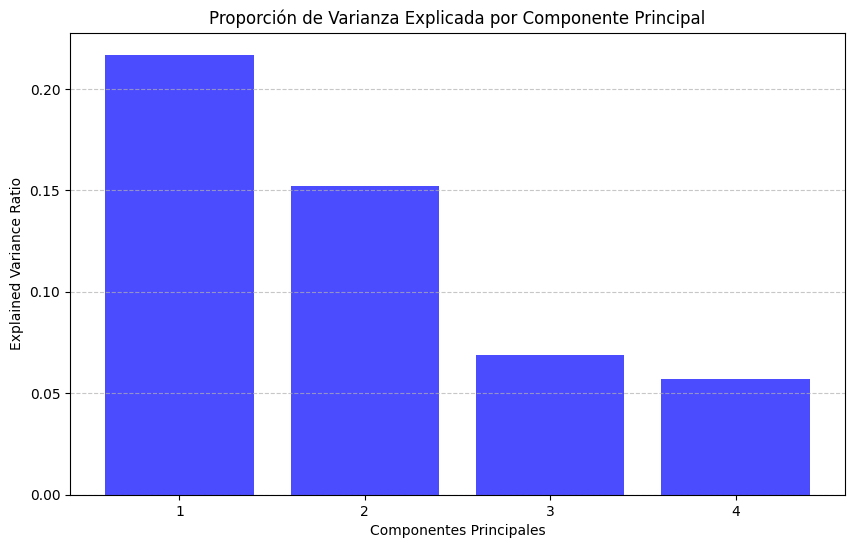

Cargas de los Componentes:
                                                      PC1    PC2    PC3    PC4
cliente.genero                                      0.015  0.013 -0.009  0.025
cliente.anciano                                     0.157  0.345  0.010  0.129
cliente.pareja                                      0.325 -0.360  0.219 -0.413
cliente.dependientes                                0.052 -0.457  0.201 -0.414
cliente.tiempo_servicio                             0.616 -0.575  0.153  0.041
telefono.servicio_telefono                          0.135  0.147  0.751  0.189
cuenta.facturacion_electronica                      0.285  0.423 -0.009 -0.031
cuenta.cobros.mensual                               0.857  0.443  0.080  0.023
cuenta.cobros.Total                                 0.722 -0.251  0.113  0.041
telefono.varias_lineas_si                           0.530  0.143  0.450  0.131
internet.servicio_internet_fibra optica             0.502  0.628  0.318  0.016
internet.servicio_interne

In [924]:
pronosticar_PCA(train_x_scaled, test_x_scaled, train_y_balanced, test_y)

###**probando otras alternativas para kbest (ya que fue el mejor en cuanto a mejorar el accuracy) sin balancear**

In [925]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_classif, f_classif
from sklearn.feature_selection import SelectFromModel

In [926]:
def pronosticar_kbest_mutual_info_classif(train_x, test_x, train_y, test_y):
    mejor_k = 0
    mejor_score = 0
    mejores_columnas = []

    # Iterar sobre el rango de posibles valores de k (número de características)
    for k in range(1, train_x.shape[1] + 1):
        seleccionar_mejores = SelectKBest(mutual_info_classif, k=k)
        seleccionar_mejores.fit(train_x, train_y)
        train_x_kbest = seleccionar_mejores.transform(train_x)

        model = RandomForestClassifier(random_state=50)

        # Validación cruzada
        scores = cross_val_score(model, train_x_kbest, train_y, cv=5, scoring='accuracy')
        score = np.mean(scores)

        # Verificar si se ha alcanzado una mejor precisión
        if score > mejor_score:
            mejor_k = k
            mejor_score = score
            mejor_seleccionador = seleccionar_mejores
            mejores_columnas = train_x.columns[seleccionar_mejores.get_support()]  # Nombres de columnas

    # Ajustar el modelo con las mejores características
    mejor_model = RandomForestClassifier(random_state=50)
    train_x_kbest = mejor_seleccionador.transform(train_x)
    test_x_kbest = mejor_seleccionador.transform(test_x)
    mejor_model.fit(train_x_kbest, train_y)
    print(f"Utilizando SelectKBest:")
    print(f"El mejor número de características seleccionadas es {mejor_k} con un score de {mejor_score:.4f}")

pronosticar_kbest_mutual_info_classif(train_x, test_x, train_y, test_y)

Utilizando SelectKBest:
El mejor número de características seleccionadas es 18 con un score de 0.7991


In [927]:
def pronosticar_kbest_f_classif(train_x, test_x, train_y, test_y):
    mejor_k = 0
    mejor_score = 0
    mejores_columnas = []

    # Iterar sobre el rango de posibles valores de k (número de características)
    for k in range(1, train_x.shape[1] + 1):
        seleccionar_mejores = SelectKBest(f_classif, k=k)
        seleccionar_mejores.fit(train_x, train_y)
        train_x_kbest = seleccionar_mejores.transform(train_x)

        model = RandomForestClassifier(random_state=50)

        # Validación cruzada
        scores = cross_val_score(model, train_x_kbest, train_y, cv=5, scoring='accuracy')
        score = np.mean(scores)

        # Verificar si se ha alcanzado una mejor precisión
        if score > mejor_score:
            mejor_k = k
            mejor_score = score
            mejor_seleccionador = seleccionar_mejores
            mejores_columnas = train_x.columns[seleccionar_mejores.get_support()]  # Nombres de columnas

    # Ajustar el modelo con las mejores características
    mejor_model = RandomForestClassifier(random_state=50)
    train_x_kbest = mejor_seleccionador.transform(train_x)
    test_x_kbest = mejor_seleccionador.transform(test_x)
    mejor_model.fit(train_x_kbest, train_y)
    print(f"Utilizando SelectKBest:")
    print(f"El mejor número de características seleccionadas es {mejor_k} con un score de {mejor_score:.4f}")

pronosticar_kbest_f_classif(train_x, test_x, train_y, test_y)

Utilizando SelectKBest:
El mejor número de características seleccionadas es 20 con un score de 0.7977
